In [1]:
import os
from pathlib import Path
from numba import njit, prange
import numpy as np
import math
from scipy.stats import norm
from pprint import pprint as pp
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
#%%
from bayesee.detector.spotter import Spotter
from bayesee.imaging.filter import *
from bayesee.imaging.image import *
from bayesee.operation.nb2d import *

row = col = 128
ppd = 120
cpd = 1.5
cpi_v = row * cpd / ppd
field_ratio = 8

rc_target = hann_window(row, col, row/2)
rc_target /= nb2dot(rc_target, rc_target)

sine_target = hann_window(row, col, row/2) * sine_wave(row, col, (cpi_v,0))
sine_target /= nb2dot(sine_target, sine_target)

tri_target = hann_window(row, col, row/2) * sine_triangle_wave(row, col, (cpi_v, 0))
tri_target /= nb2dot(tri_target, tri_target)

sqr_target = hann_window(row, col, row/2) * sine_square_wave(row, col, (cpi_v, 0))
sqr_target /= nb2dot(sqr_target, sqr_target)

weighting_matrix = luminance_modulate_lr(np.ones((row,col)), 4, flip=True)
TM = Spotter(method='TM')
WTM = Spotter(method='WTM', whiten=1)
RTM = Spotter(method='RTM', weight=weighting_matrix)
WRTM = Spotter(method='WRTM', whiten=1, weight=weighting_matrix)
RWTM = Spotter(method='RWTM', whiten=1, weight=weighting_matrix)

In [6]:
n = 1000
images, field = power_noise_patches(row, col, row*field_ratio, col*field_ratio, -1, n)
cm_images = np.zeros_like(images)

for i in range(n):
    cm_images[:,:,i] = contrast_modulate_lr(images[:,:,i], 4)

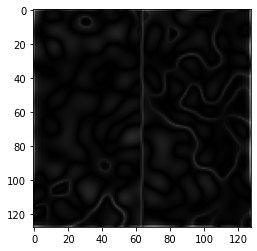

In [10]:
x = WRTM.respond(cm_images[:,:,50], rc_target)[1]
imshow(x, cmap='gray')